In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [4]:
df = pd.read_csv("feature_engineered.csv")
col = ["exposure*bonusmalus",	"Density_over_VehAge","Area","VehBrand","Region","VehGas"]

df = df.drop(axis=1, columns=col)
df

,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density
0,0,0.43,7,18,36,95,1054
1,0,0.10,7,17,80,95,598
2,0,0.33,7,3,36,76,4172
3,0,0.56,5,4,73,52,15
4,0,0.27,8,0,37,50,3021
...,...,...,...,...,...,...,...
541411,0,0.20,6,10,32,76,1314
541412,0,0.06,10,14,34,60,685
541413,0,0.34,6,8,32,95,242
541414,0,0.72,9,7,39,72,3301


,Exposure,Density,DrivAge,VehAge,VehPower,BonusMalus,VehGas_Regular,VehBrand_B10,VehBrand_B11,VehBrand_B12,VehBrand_B13,VehBrand_B14,VehBrand_B2,VehBrand_B3,VehBrand_B4,VehBrand_B5,VehBrand_B6
0,0.43,1054,36,18,7,95,1,0,0,0,0,0,0,0,0,0,0
1,0.10,598,80,17,7,95,1,0,0,0,0,0,1,0,0,0,0
2,0.33,4172,36,3,7,76,1,0,0,0,0,0,0,0,0,0,1
3,0.56,15,73,4,5,52,0,0,0,0,1,0,0,0,0,0,0
4,0.27,3021,37,0,8,50,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541411,0.20,1314,32,10,6,76,0,0,0,0,0,0,1,0,0,0,0
541412,0.06,685,34,14,10,60,0,0,0,0,0,0,0,0,0,1,0
541413,0.34,242,32,8,6,95,0,0,0,0,0,0,0,0,0,1,0
541414,0.72,3301,39,7,9,72,1,0,0,0,0,0,1,0,0,0,0


In [5]:
#df1 = pd.read_csv("/Users/simonbruun-simonsen/Desktop/ML-project/feature_engineered.csv")
#df1 = df1[df1['Exposure'] <= 1]

df['Exposure'] = df['Exposure'].round(2)

X = df[['Exposure','Density', 'DrivAge', 'VehAge','VehPower', 'BonusMalus']]
X = pd.get_dummies(X, drop_first=True, dtype="int")
X


,Exposure,Density,DrivAge,VehAge,VehPower,BonusMalus
0,0.43,1054,36,18,7,95
1,0.10,598,80,17,7,95
2,0.33,4172,36,3,7,76
3,0.56,15,73,4,5,52
4,0.27,3021,37,0,8,50
...,...,...,...,...,...,...
541411,0.20,1314,32,10,6,76
541412,0.06,685,34,14,10,60
541413,0.34,242,32,8,6,95
541414,0.72,3301,39,7,9,72


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
intertia = []
for k in range(1,40):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X_scaled)
    intertia.append(kmeans.inertia_)

In [33]:
intertia

[3248495.9999999953,
 2655218.7775584115,
 2275628.5088726897,
 1906445.3264827407,
 1681047.5174440537,
 1529130.0663079552,
 1410731.1579092788,
 1334606.1174360604,
 1278920.02931563,
 1237291.868769899,
 1162462.6377175471,
 1121651.5049734302,
 1106183.3797478753,
 1074106.9085567682,
 1042462.2059014344,
 1013117.035448603,
 988062.7626506072,
 963025.2520007623,
 947402.1884612974,
 926370.6630503127,
 906642.26898816,
 881272.4198952261,
 864115.7628231712,
 849439.4979597484,
 840016.9160773053,
 828665.1936792781,
 815599.1272394113,
 802864.1123046663,
 792736.8749890024,
 783012.0191580065,
 773821.1645084206,
 763090.2759086543,
 751642.2072277438,
 744332.8413050359,
 734287.8590778457,
 727697.0658139825,
 712078.8093922028,
 705263.1270442082,
 697956.5694625557]

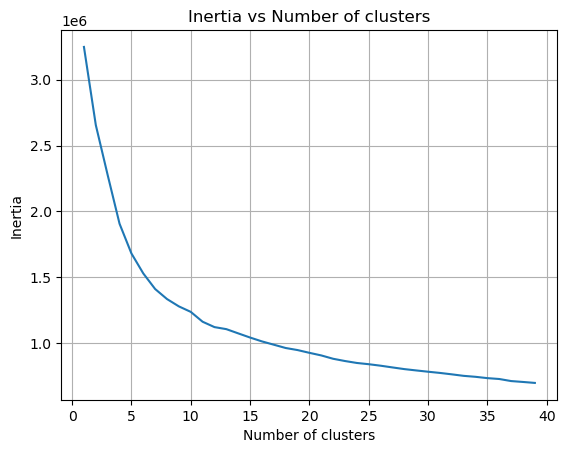

In [8]:
k_clust = list(range(1,40))
plt.plot(k_clust,intertia)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Inertia vs Number of clusters")
plt.grid(True)

In [10]:
kmeans = KMeans(n_clusters=4,random_state=42)
kmeans.fit(X_scaled)
df["cluster"] = kmeans.fit_predict(X_scaled)

In [18]:
df["Density"]

0         1054
1          598
2         4172
3           15
4         3021
          ... 
541411    1314
541412     685
541413     242
541414    3301
541415      26
Name: Density, Length: 541416, dtype: int64

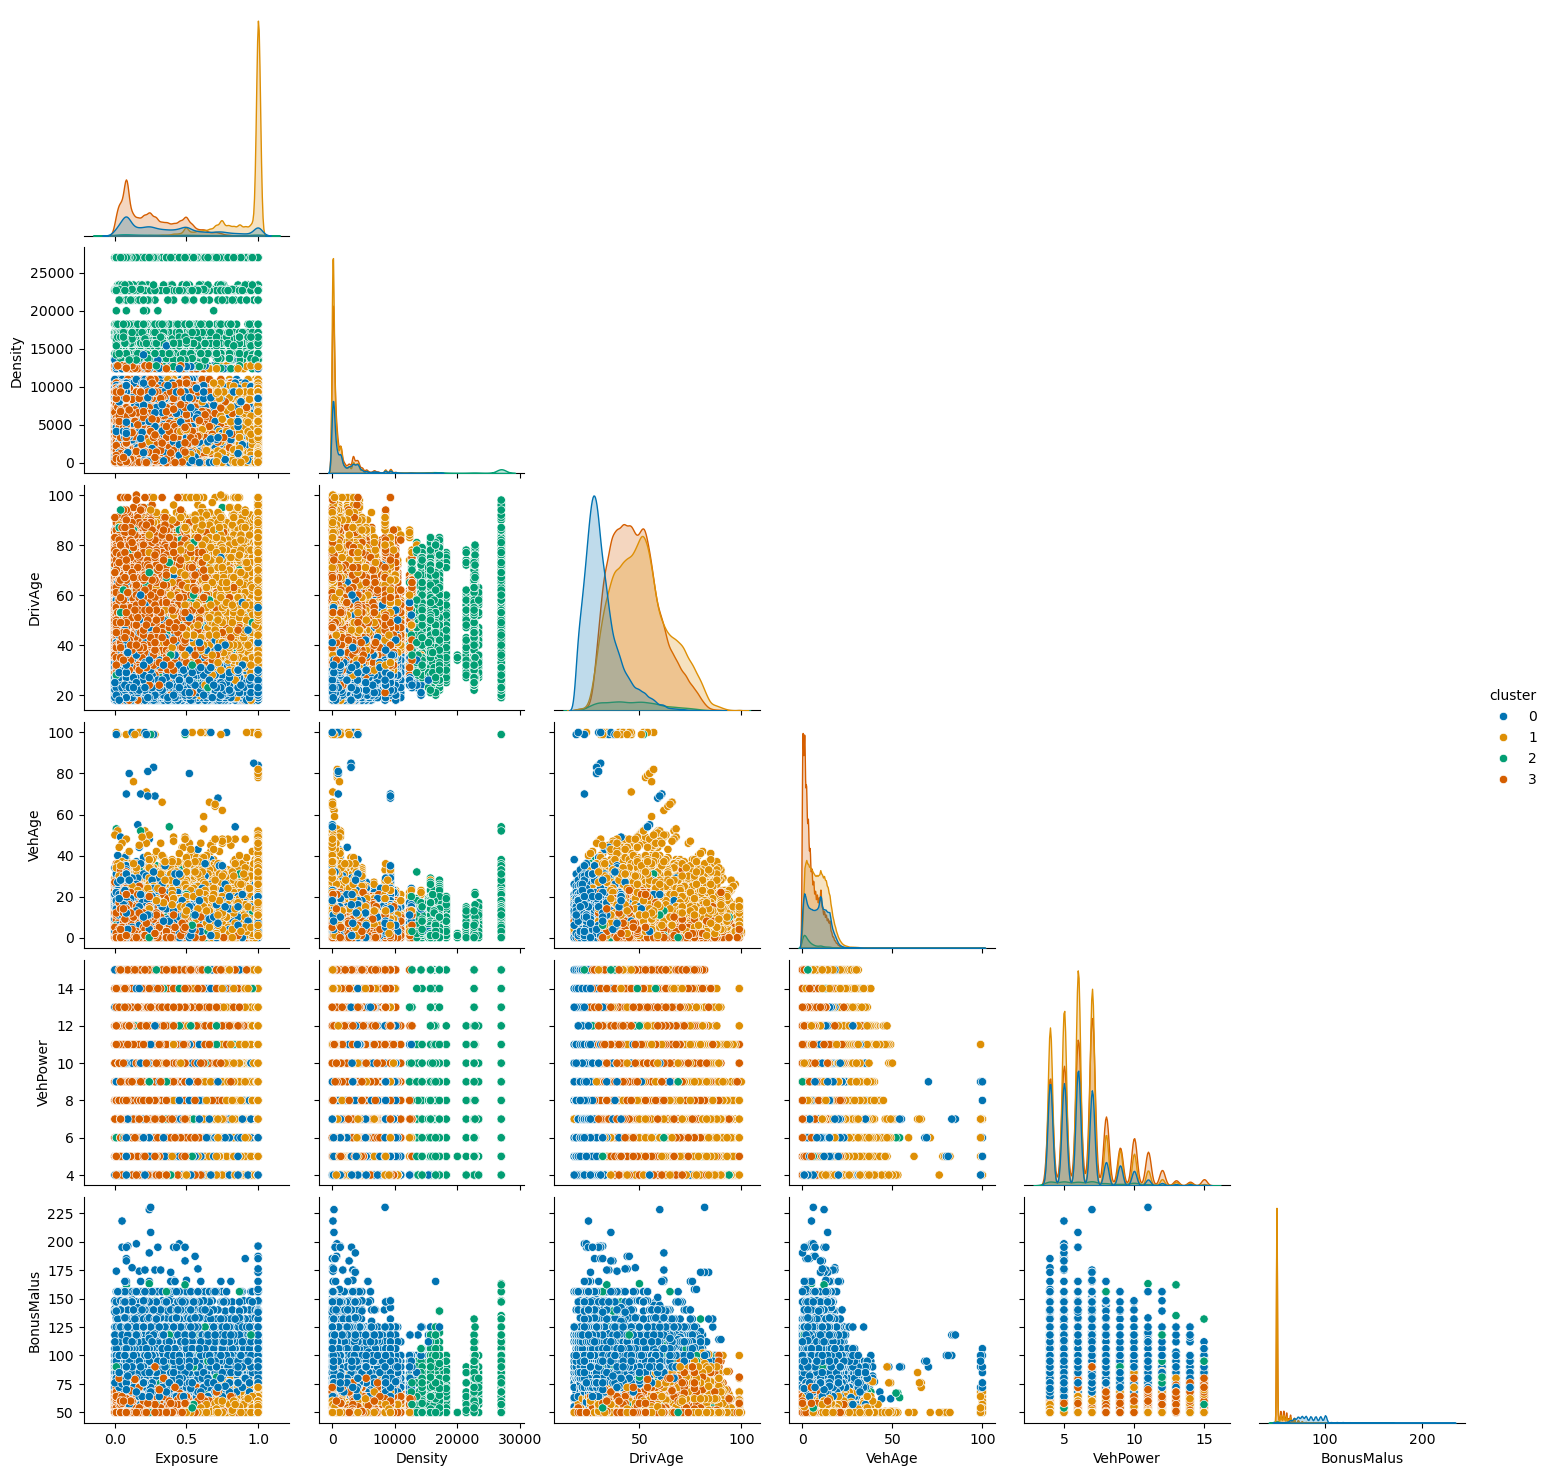

In [12]:
sns.pairplot(df, hue="cluster", vars=['Exposure','Density', 'DrivAge', 'VehAge','VehPower', 'BonusMalus'], corner=True, palette="colorblind")

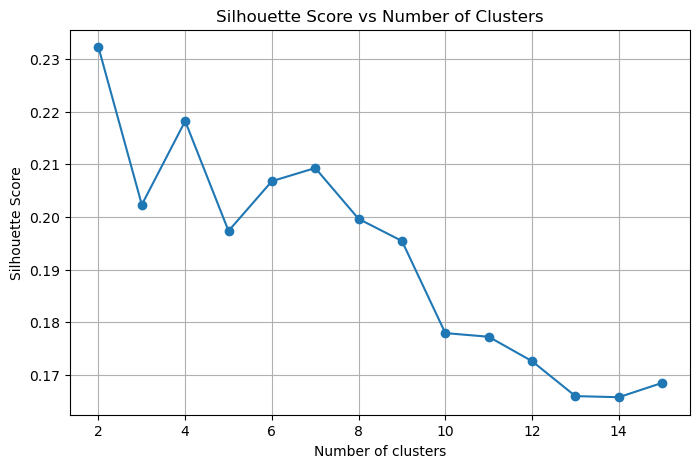

In [102]:
sil_scores = []
idx = np.random.choice(len(X_scaled), size=100000, replace=False)

for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled[idx])
    score = silhouette_score(X_scaled[idx], labels)
    sil_scores.append(score)

# Plot silhouette scores
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(range(2,16), sil_scores, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters")
plt.grid(True)
plt.show()

In [95]:
idx = np.random.choice(len(X_scaled), size=100000, replace=False)
silhouette_score(X_scaled[idx], kmeans.labels_[idx])

0.24022929295003195

In [97]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_scaled)

In [ ]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

df["pca1"] = X_pca[:, 0]
df["pca2"] = X_pca[:, 1]


array([[ 2.02881068,  1.57269226],
       [ 0.36965038,  0.60262396],
       [ 1.34155472, -0.83551002],
       ...,
       [ 2.25035161,  0.57597908],
       [ 0.55693445, -0.12667384],
       [ 2.06336146,  1.93949234]])

In [99]:
plot_df = df.sample(n=100000, random_state=42)

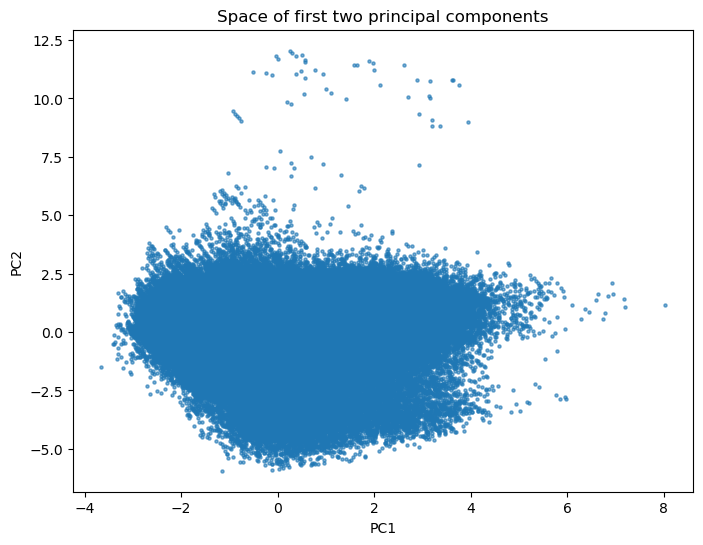

In [22]:
plt.figure(figsize=(8,6))
plt.scatter(
    df["pca1"],
    df["pca2"],
    #c=plot_df["cluster"],
    s=5,
    alpha=0.6
)
centroids_pca = pca.transform(kmeans.cluster_centers_)

#plt.scatter(centroids_pca[:,0], centroids_pca[:,1], s=200)
#for i in range(3):
#    plt.text(centroids_pca[i,0], centroids_pca[i,1], f"C{i+1}")

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Space of first two principal components")
plt.show()

In [74]:
pca = PCA(random_state=42)
X_pca = pca.fit_transform(X_scaled)

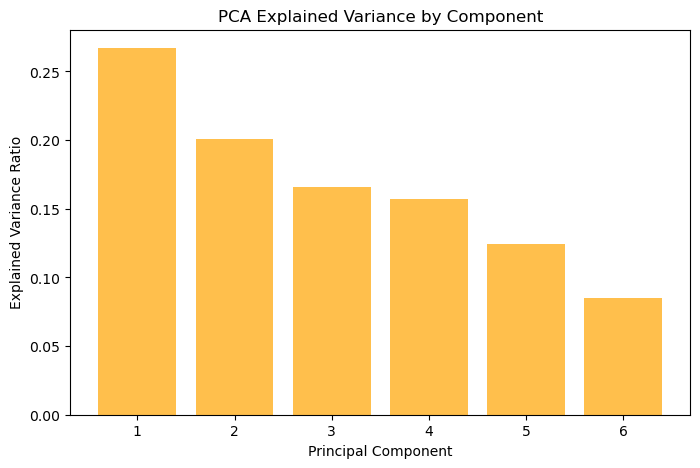

In [76]:
var_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(8,5))
plt.bar(range(1, len(var_ratio)+1), var_ratio, alpha=0.7,color="orange")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("PCA Explained Variance by Component")
plt.xticks(range(1, len(var_ratio)+1))
plt.show()

In [1]:
ev = pca.explained_variance_
print(ev)

NameError: name 'pca' is not defined

In [86]:
cluster_summary = df.groupby('cluster').mean()
print(cluster_summary)

          ClaimNb  Exposure   VehPower     VehAge    DrivAge  BonusMalus  \
cluster                                                                    
0        0.043993  0.690308   6.123356  14.591177  45.779845   54.036776   
1        0.050209  0.450423  10.605886   5.715911  46.952584   54.826430   
2        0.070797  0.906502   5.849042   5.051459  53.943772   52.137676   
3        0.063515  0.386787   5.902245   7.838840  30.924301   86.799553   
4        0.036963  0.221810   5.847600   3.804367  47.323162   53.412080   
5        0.067342  0.461433   7.084423   4.369238  46.919173   63.257110   

              Density      pca1      pca2  
cluster                                    
0          986.676192 -0.386688  1.177571  
1         1382.425486 -0.363785 -0.869494  
2         1031.028249 -1.109600  0.270817  
3         1637.359985  1.953683  0.408139  
4         1423.054498 -0.037869 -0.713871  
5        23951.361883  0.804381 -3.064164  


In [89]:
df = df.drop(axis=1,columns=["pca1","pca2"])

In [90]:
df

,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,cluster
0,0,0.43,7,18,36,95,1054,3
1,0,0.10,7,17,80,95,598,0
2,0,0.33,7,3,36,76,4172,3
3,0,0.56,5,4,73,52,15,2
4,0,0.27,8,0,37,50,3021,4
...,...,...,...,...,...,...,...,...
541411,0,0.20,6,10,32,76,1314,3
541412,0,0.06,10,14,34,60,685,1
541413,0,0.34,6,8,32,95,242,3
541414,0,0.72,9,7,39,72,3301,1


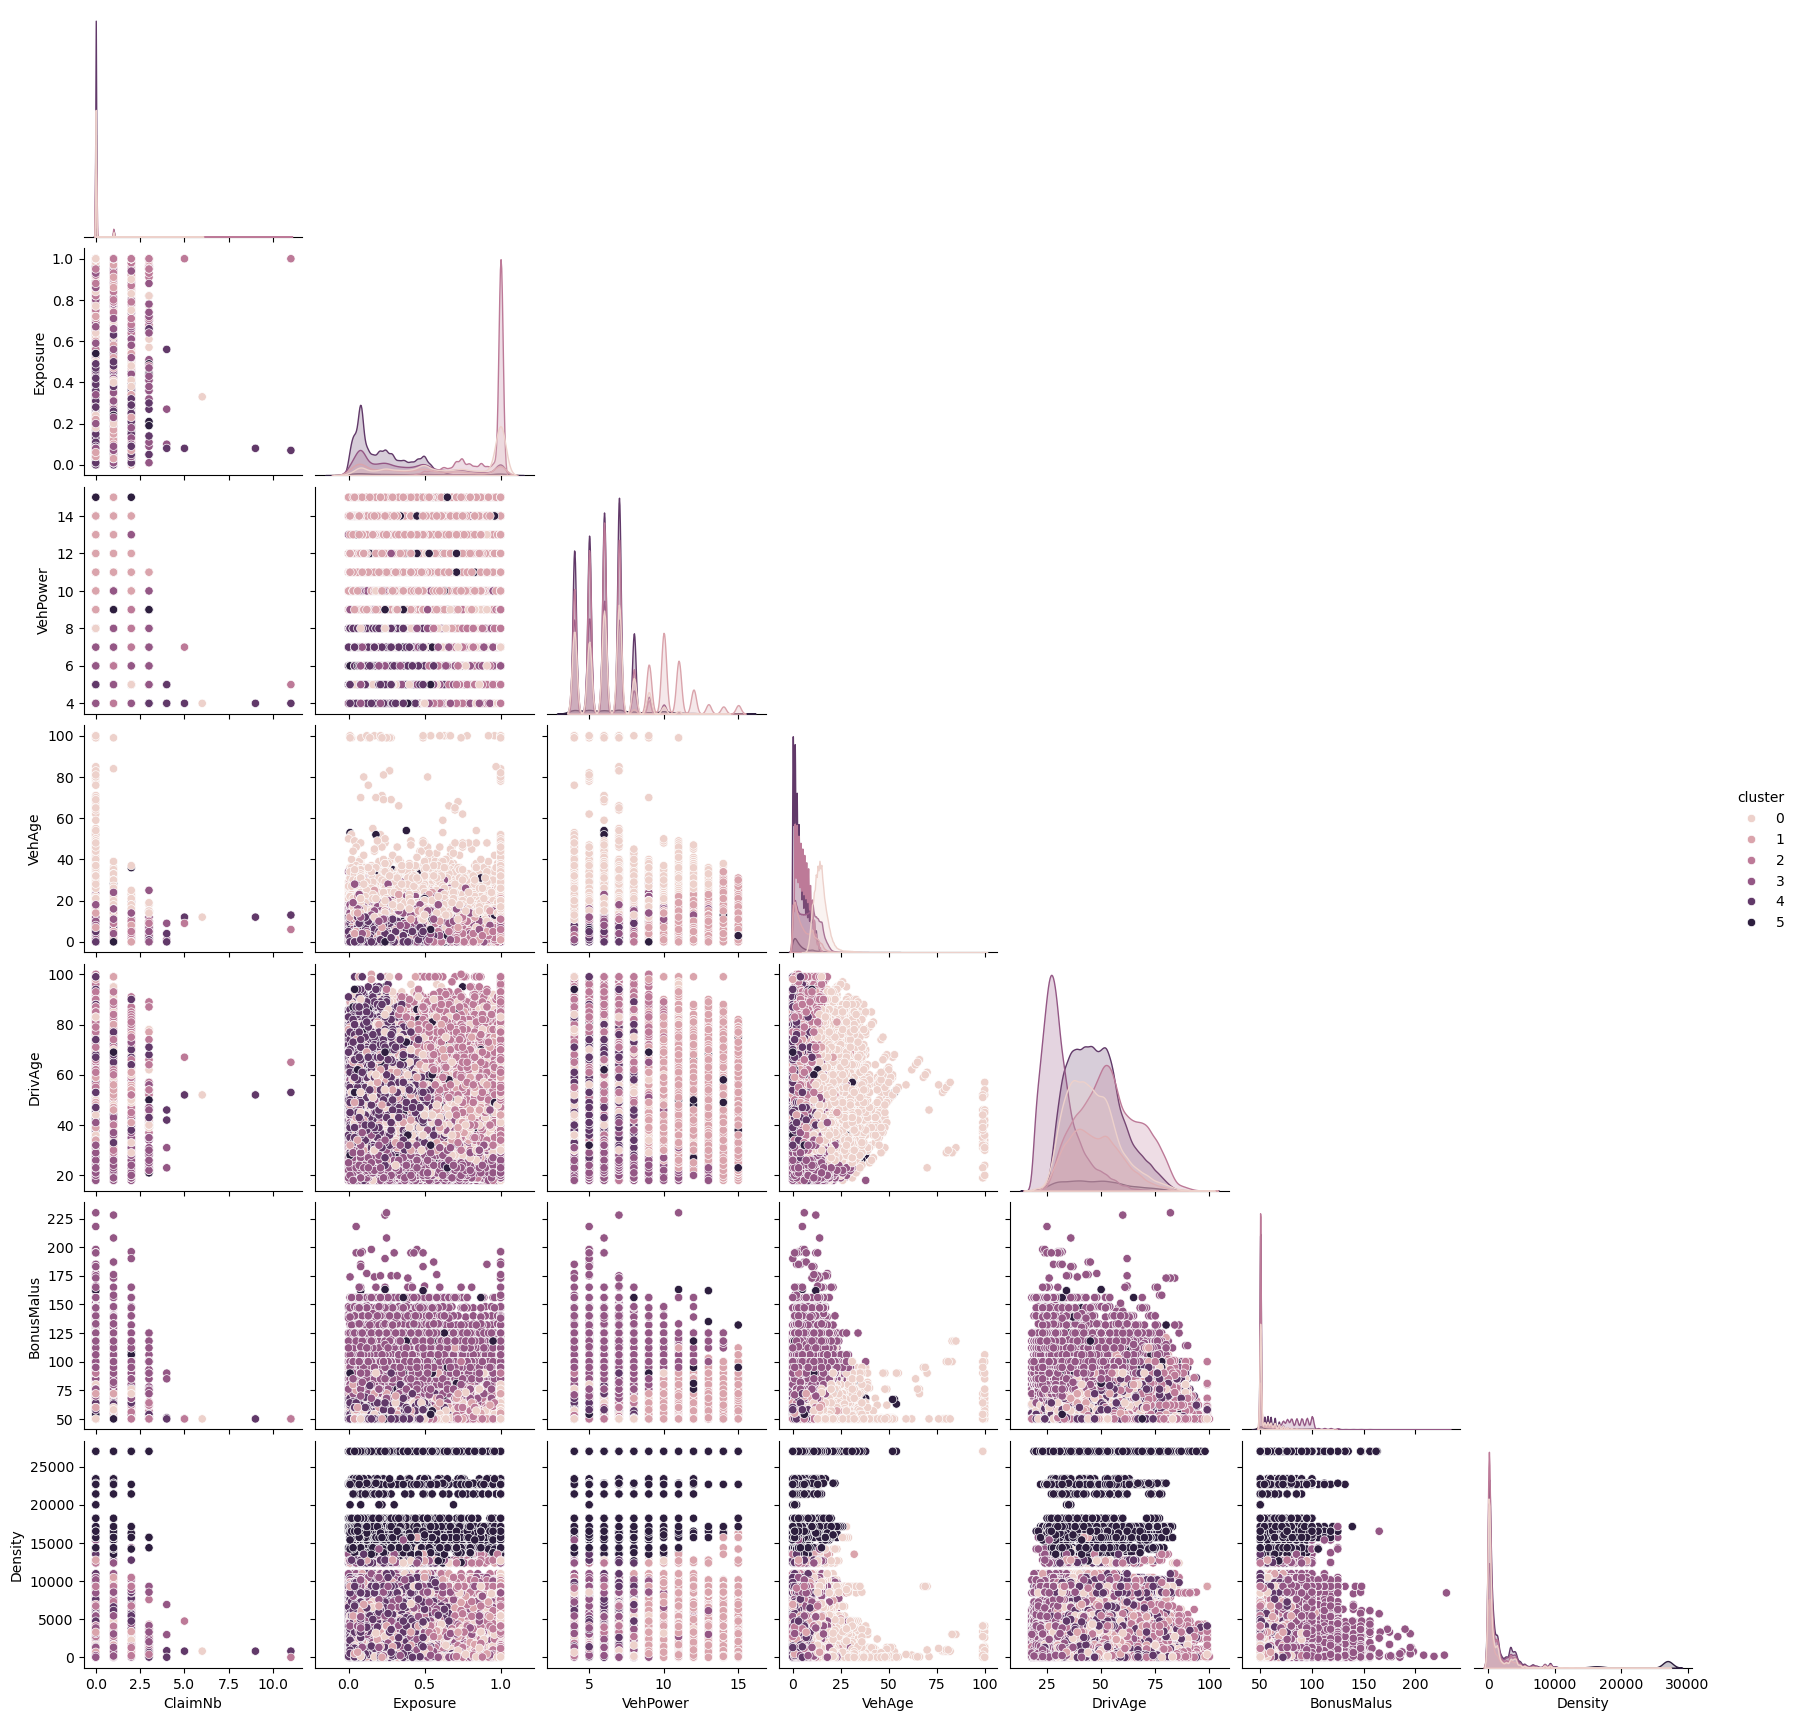

In [91]:
sns.pairplot(df,hue="cluster",corner = True)